<a href="https://colab.research.google.com/github/MehrdadJalali-AI/MOF_Optimization/blob/main/LEA_MOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/GAN-NodeGeneration/')
!pip install rdkit

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 30.5 MB/s eta 0:00:00


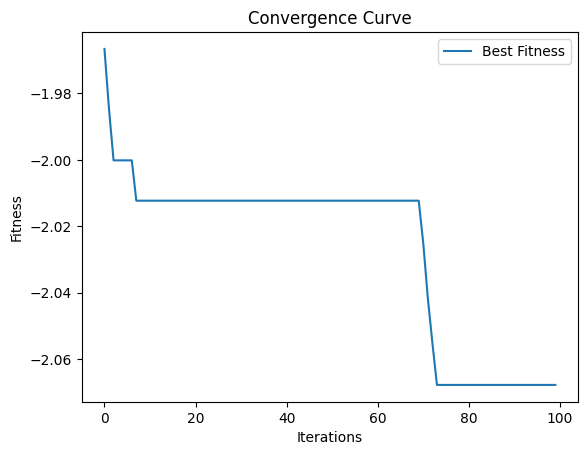

Best MOF from LEA: [0.75697244 0.64940619 0.81300194 0.89529201 0.47349934] Fitness: -2.0678564797230483
Best MOF from DE: [1. 1. 1. 1. 1.] Fitness: -2.5999999999999996


In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1)
df = (df - df.min()) / (df.max() - df.min())

# Define fitness function
def fitness_function(solution):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    return - (porosity_score * 0.6 + stability_score * 0.4)  # Negative for minimization

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = fitness_function
        self.fitness_history = []

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function)
best_solution, best_fitness = lea.optimize()
lea.plot_convergence()

# Differential Evolution (DE) for comparison
de_result = differential_evolution(fitness_function, bounds=[(0,1)] * 5)
de_fitness = de_result.fun

# Print results
print("Best MOF from LEA:", best_solution, "Fitness:", best_fitness)
print("Best MOF from DE:", de_result.x, "Fitness:", de_fitness)


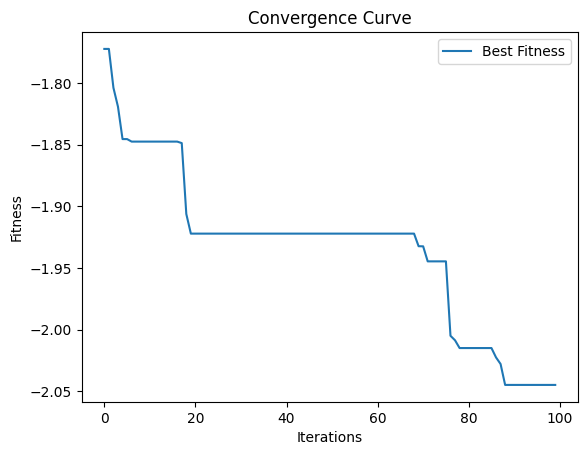

Best MOF from LEA: UNUNEY [0.67239155 0.90818972 0.7855464  0.99032844 0.41566204] Fitness: -2.044759721078693
Best MOF from DE: [1. 1. 1. 1. 1.] Fitness: -2.5999999999999996


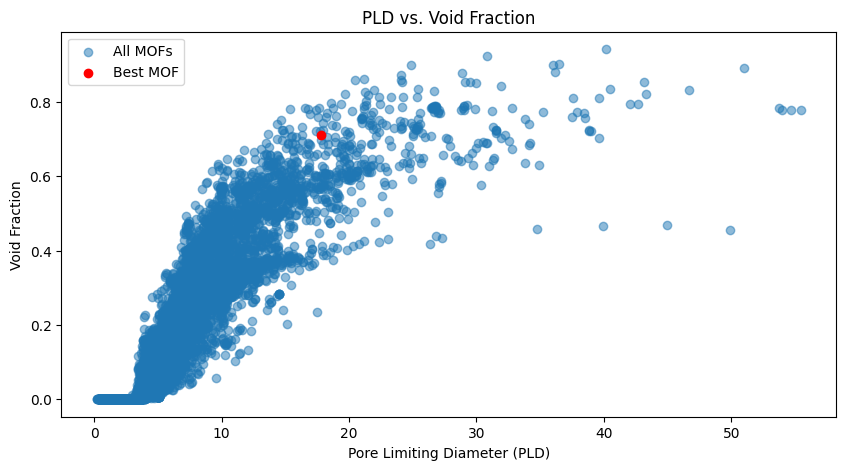

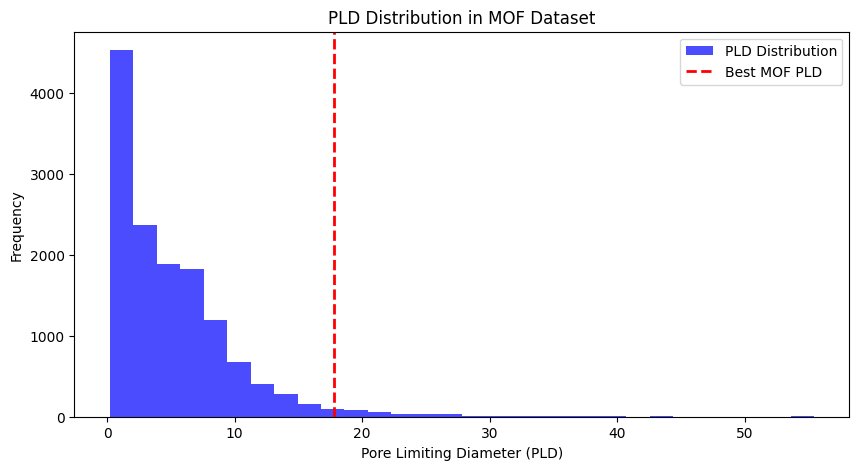

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['Refcode', 'void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1) except Refcode
df_norm = df.copy()
df_norm[features[1:]] = (df[features[1:]] - df[features[1:]].min()) / (df[features[1:]].max() - df[features[1:]].min())

# Define fitness function
def fitness_function(solution):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    return - (porosity_score * 0.6 + stability_score * 0.4)  # Negative for minimization

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = fitness_function
        self.fitness_history = []
        self.best_mof_name = None

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
                    closest_mof = df_norm.iloc[((df_norm[features[1:]] - self.best_solution) ** 2).sum(axis=1).idxmin()]
                    self.best_mof_name = closest_mof['Refcode']
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness, self.best_mof_name

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function)
best_solution, best_fitness, best_mof_name = lea.optimize()
lea.plot_convergence()

# Differential Evolution (DE) for comparison
de_result = differential_evolution(fitness_function, bounds=[(0,1)] * 5)
de_fitness = de_result.fun

# Print results
print("Best MOF from LEA:", best_mof_name, best_solution, "Fitness:", best_fitness)
print("Best MOF from DE:", de_result.x, "Fitness:", de_fitness)

# Additional plots for evaluations
plt.figure(figsize=(10,5))
plt.scatter(df['pld (A)'], df['void_fraction'], alpha=0.5, label='All MOFs')
plt.scatter(df.loc[df['Refcode'] == best_mof_name, 'pld (A)'], df.loc[df['Refcode'] == best_mof_name, 'void_fraction'], color='red', label='Best MOF')
plt.xlabel('Pore Limiting Diameter (PLD)')
plt.ylabel('Void Fraction')
plt.title('PLD vs. Void Fraction')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df['pld (A)'], bins=30, alpha=0.7, color='blue', label='PLD Distribution')
plt.axvline(df.loc[df['Refcode'] == best_mof_name, 'pld (A)'].values[0], color='red', linestyle='dashed', linewidth=2, label='Best MOF PLD')
plt.xlabel('Pore Limiting Diameter (PLD)')
plt.ylabel('Frequency')
plt.title('PLD Distribution in MOF Dataset')
plt.legend()
plt.show()


Enter your preferred conditions for MOF selection:
Minimum Void Fraction (0 to 1): 0.5
Minimum ASA (0 to 1): 0.1
Minimum PLD (0 to 1): 0.3
Minimum Metal Coordination (0 to 1): 0.3
Minimum SBU Extension Points (0 to 1): 2


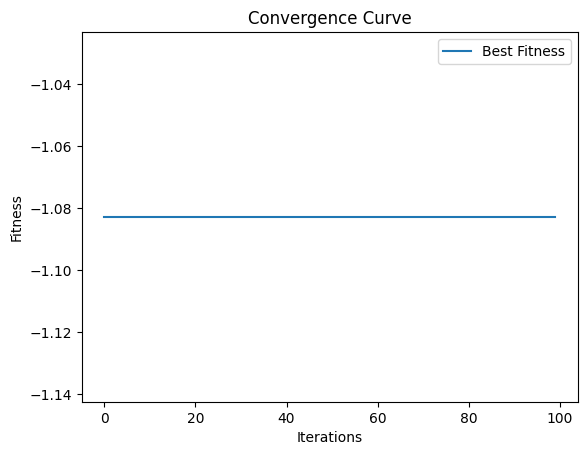

Best MOF from LEA for user preferences: UNUNEY [0.47916047 0.9855649  0.27332194 0.98532681 0.71690942] Fitness: -1.0827799343131406


In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['Refcode', 'void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1) except Refcode
df_norm = df.copy()
df_norm[features[1:]] = (df[features[1:]] - df[features[1:]].min()) / (df[features[1:]].max() - df[features[1:]].min())

# Function to take user input for MOF selection criteria
def get_user_conditions():
    print("Enter your preferred conditions for MOF selection:")
    void_fraction_min = float(input("Minimum Void Fraction (0 to 1): "))
    asa_min = float(input("Minimum ASA (0 to 1): "))
    pld_min = float(input("Minimum PLD (0 to 1): "))
    metal_coord_min = float(input("Minimum Metal Coordination (0 to 1): "))
    sbu_ext_min = float(input("Minimum SBU Extension Points (0 to 1): "))
    return [void_fraction_min, asa_min, pld_min, metal_coord_min, sbu_ext_min]

# Define fitness function with user input
def fitness_function(solution, user_conditions):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    user_preference_score = -sum(abs(np.array(solution) - np.array(user_conditions)))  # Match user preferences
    return - (porosity_score * 0.5 + stability_score * 0.3 + user_preference_score * 0.2)  # Weighted scoring

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function, user_conditions):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = lambda sol: fitness_function(sol, user_conditions)
        self.fitness_history = []
        self.best_mof_name = None

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
                    closest_mof = df_norm.iloc[((df_norm[features[1:]] - self.best_solution) ** 2).sum(axis=1).idxmin()]
                    self.best_mof_name = closest_mof['Refcode']
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness, self.best_mof_name

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Get user conditions
user_conditions = get_user_conditions()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function, user_conditions=user_conditions)
best_solution, best_fitness, best_mof_name = lea.optimize()
lea.plot_convergence()

# Print results
print("Best MOF from LEA for user preferences:", best_mof_name, best_solution, "Fitness:", best_fitness)


Enter your preferred conditions for MOF selection:
Minimum Void Fraction (0 to 1): 0.9
Minimum ASA (0 to 1): 0.9
Minimum PLD (0 to 1): 0.9
Minimum Metal Coordination (0 to 1): 0.9
Minimum SBU Extension Points (0 to 1): 0.9


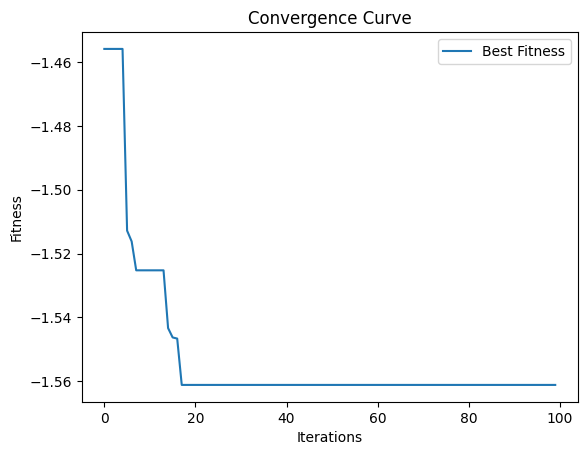

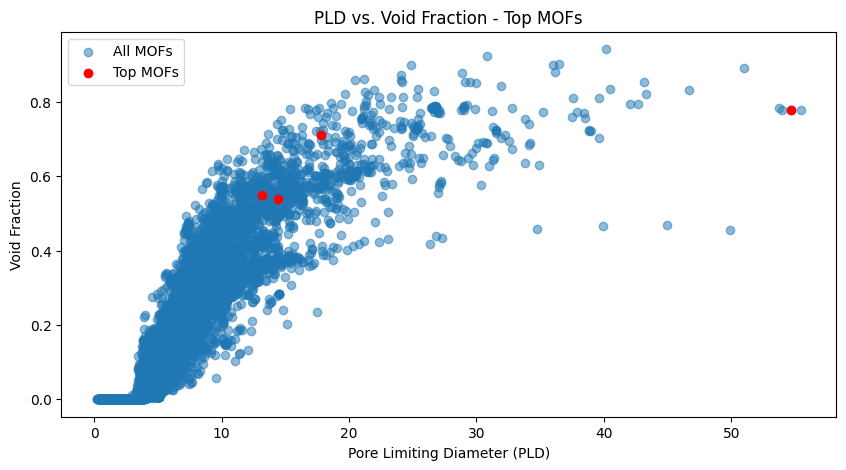

Best MOF from LEA for user preferences: UNUNEY [0.94952529 0.84401842 0.52518542 0.78691424 0.62680858] Fitness: -1.5611397725581415
Top MOF Candidates: ['ALULEZ', 'UFORIT', 'UNUNEY', 'MUGGIG01', 'MUGGIG01', 'MUGGIG01', 'MUGGIG01', 'UNUNEY', 'UNUNEY', 'UNUNEY', 'UNUNEY']


In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['Refcode', 'void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1) except Refcode
df_norm = df.copy()
df_norm[features[1:]] = (df[features[1:]] - df[features[1:]].min()) / (df[features[1:]].max() - df[features[1:]].min())

# Function to take user input for MOF selection criteria
def get_user_conditions():
    print("Enter your preferred conditions for MOF selection:")
    void_fraction_min = float(input("Minimum Void Fraction (0 to 1): "))
    asa_min = float(input("Minimum ASA (0 to 1): "))
    pld_min = float(input("Minimum PLD (0 to 1): "))
    metal_coord_min = float(input("Minimum Metal Coordination (0 to 1): "))
    sbu_ext_min = float(input("Minimum SBU Extension Points (0 to 1): "))
    return [void_fraction_min, asa_min, pld_min, metal_coord_min, sbu_ext_min]

# Define fitness function with user input
def fitness_function(solution, user_conditions):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    user_preference_score = -sum(abs(np.array(solution) - np.array(user_conditions)))  # Match user preferences
    return - (porosity_score * 0.5 + stability_score * 0.3 + user_preference_score * 0.2)  # Weighted scoring

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function, user_conditions):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = lambda sol: fitness_function(sol, user_conditions)
        self.fitness_history = []
        self.best_mof_name = None
        self.best_mof_candidates = []

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
                    closest_mof = df_norm.iloc[((df_norm[features[1:]] - self.best_solution) ** 2).sum(axis=1).idxmin()]
                    self.best_mof_name = closest_mof['Refcode']
                    self.best_mof_candidates.append(self.best_mof_name)
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness, self.best_mof_name, self.best_mof_candidates

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

    def plot_mof_comparison(self):
        plt.figure(figsize=(10,5))
        plt.scatter(df['pld (A)'], df['void_fraction'], alpha=0.5, label='All MOFs')
        plt.scatter(df.loc[df['Refcode'].isin(self.best_mof_candidates), 'pld (A)'],
                    df.loc[df['Refcode'].isin(self.best_mof_candidates), 'void_fraction'],
                    color='red', label='Top MOFs')
        plt.xlabel('Pore Limiting Diameter (PLD)')
        plt.ylabel('Void Fraction')
        plt.title('PLD vs. Void Fraction - Top MOFs')
        plt.legend()
        plt.show()

# Get user conditions
user_conditions = get_user_conditions()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function, user_conditions=user_conditions)
best_solution, best_fitness, best_mof_name, best_mof_candidates = lea.optimize()
lea.plot_convergence()
lea.plot_mof_comparison()

# Print results
print("Best MOF from LEA for user preferences:", best_mof_name, best_solution, "Fitness:", best_fitness)
print("Top MOF Candidates:", best_mof_candidates)


Enter your preferred conditions for MOF selection (provide a range for each criterion):
Void Fraction Range (e.g., 0.2 0.8): 0.4 0.5
ASA Range (e.g., 0.1 0.9): 0.2 0.7
PLD Range (e.g., 0.5 1.0): 0.4 0.6
Metal Coordination Range (e.g., 0.2 0.8): 0.3 0.5
SBU Extension Points Range (e.g., 0.1 0.7): 0.2 0.4


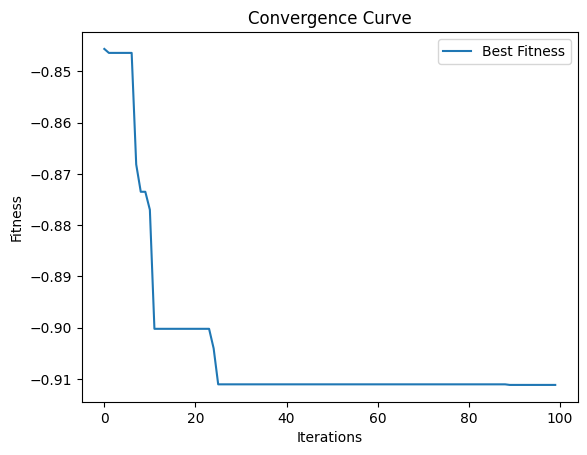

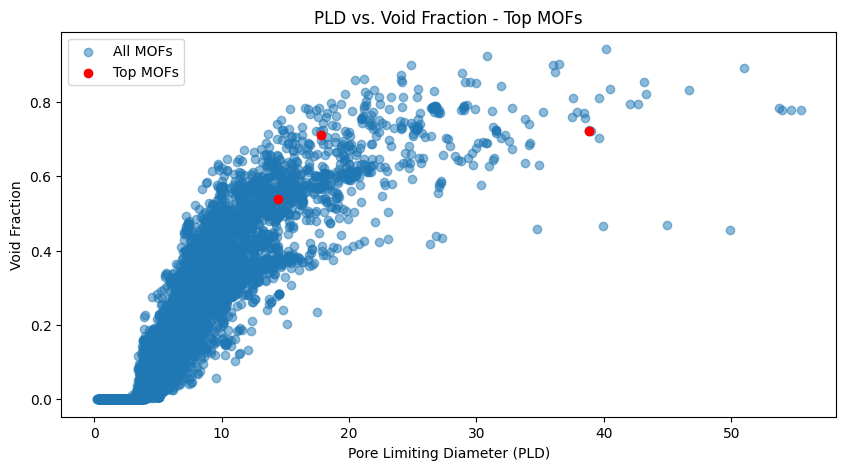

Best MOF from LEA for user preferences: UNUNEY [0.94874226 0.86367061 0.96133171 0.59940729 0.49396376] Fitness: -0.9111960596077672
Top MOF Candidates: ['UFORIT', 'UNUNEY', 'ZEFYOA', 'UFORIT', 'UFORIT', 'UFORIT', 'UFORIT', 'UFORIT', 'UFORIT', 'UFORIT', 'UFORIT', 'UNUNEY']


In [12]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['Refcode', 'void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1) except Refcode
df_norm = df.copy()
df_norm[features[1:]] = (df[features[1:]] - df[features[1:]].min()) / (df[features[1:]].max() - df[features[1:]].min())

# Function to take user input for MOF selection criteria
def get_user_conditions():
    print("Enter your preferred conditions for MOF selection (provide a range for each criterion):")
    void_fraction_range = list(map(float, input("Void Fraction Range (e.g., 0.2 0.8): ").split()))
    asa_range = list(map(float, input("ASA Range (e.g., 0.1 0.9): ").split()))
    pld_range = list(map(float, input("PLD Range (e.g., 0.5 1.0): ").split()))
    metal_coord_range = list(map(float, input("Metal Coordination Range (e.g., 0.2 0.8): ").split()))
    sbu_ext_range = list(map(float, input("SBU Extension Points Range (e.g., 0.1 0.7): ").split()))
    return [void_fraction_range, asa_range, pld_range, metal_coord_range, sbu_ext_range]

# Define fitness function with user input
def fitness_function(solution, user_conditions):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    user_preference_score = -sum([(0 if user_conditions[i][0] <= solution[i] <= user_conditions[i][1] else abs(solution[i] - np.mean(user_conditions[i]))) for i in range(len(solution))])
    return - (porosity_score * 0.4 + stability_score * 0.3 + user_preference_score * 0.3)  # Weighted scoring

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function, user_conditions):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = lambda sol: fitness_function(sol, user_conditions)
        self.fitness_history = []
        self.best_mof_name = None
        self.best_mof_candidates = []

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
                    closest_mof = df_norm.iloc[((df_norm[features[1:]] - self.best_solution) ** 2).sum(axis=1).idxmin()]
                    self.best_mof_name = closest_mof['Refcode']
                    self.best_mof_candidates.append(self.best_mof_name)
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness, self.best_mof_name, self.best_mof_candidates

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

    def plot_mof_comparison(self):
        plt.figure(figsize=(10,5))
        plt.scatter(df['pld (A)'], df['void_fraction'], alpha=0.5, label='All MOFs')
        plt.scatter(df.loc[df['Refcode'].isin(self.best_mof_candidates), 'pld (A)'],
                    df.loc[df['Refcode'].isin(self.best_mof_candidates), 'void_fraction'],
                    color='red', label='Top MOFs')
        plt.xlabel('Pore Limiting Diameter (PLD)')
        plt.ylabel('Void Fraction')
        plt.title('PLD vs. Void Fraction - Top MOFs')
        plt.legend()
        plt.show()

# Get user conditions
user_conditions = get_user_conditions()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function, user_conditions=user_conditions)
best_solution, best_fitness, best_mof_name, best_mof_candidates = lea.optimize()
lea.plot_convergence()
lea.plot_mof_comparison()

# Print results
print("Best MOF from LEA for user preferences:", best_mof_name, best_solution, "Fitness:", best_fitness)
print("Top MOF Candidates:", best_mof_candidates)
